<h1>Nuage de mots pour the picture of doran grey</h1>

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(-0.5, 999.5, 599.5, -0.5)

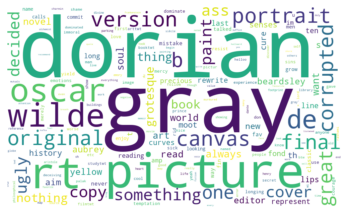

In [1]:
import csv
import re
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
from collections import Counter


# Télécharger la liste de stop-words en français
nltk.download('stopwords')
stop_words = stopwords.words('english')

# Lire le fichier CSV et stocker les tweets dans une liste
with open('the_picture_of_dorian_grey.csv', 'r', encoding='utf8') as f:
  reader = csv.reader(f)
  tweets = list(reader)

# Fonction pour enlever les hashtags, mentions, URL et stop-words d'un tweet
def clean_tweet(tweet):
  tweet = tweet.lower()  # Convertir le tweet en lower case
  tweet = re.sub(r'#\S+', '', tweet)  # enlever les hashtags
  tweet = re.sub(r'@\S+', '', tweet)  # enlever les mentions
  tweet = re.sub(r'https?://\S+', '', tweet)  # enlever les URL

  # Enlever les stop-words
  words = tweet.split()
  words = [word for word in words if word not in stop_words]
  tweet = ' '.join(words)

  return tweet

# Enlever les hashtags, mentions, URL et stop-words de chaque tweet
cleaned_tweets = []

for tweet in tweets:
  cleaned_tweets.append(clean_tweet(tweet[0]))

# Générer le nuage de mots
text = ' '.join(cleaned_tweets)
wordcloud = WordCloud(collocations = False, width = 1000, height = 600,
                     background_color='white').generate(text)

# Afficher le nuage de mots
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")



<h1>Les 10 bigrammes les plus tweets</h1>

In [2]:
import re



def remove_special_characters_and_spaces(string):
  no_special_characters = re.sub(r'[^\w\s]', '', string)
  no_spaces = re.sub(r'\s+', '', no_special_characters)
  return no_spaces

bigrams = []
for tweet in cleaned_tweets:
  words = tweet.split()
  for i in range(len(words)-1):
    word1 = remove_special_characters_and_spaces(words[i])
    word2 = remove_special_characters_and_spaces(words[i+1])
    if word1 and word2 and len(word1) > 1 and len(word2) > 1:  # vérifie si les mots ne sont pas des chaînes vides et si la longueur de chaque mot est supérieure à 1
      bigram = word1 + ' ' + word2
      bigrams.append(bigram)





# compter les bigrammes
bigram_counts = Counter(bigrams)

# afficher les bigrammes les plus fréquents
top_bigrams = bigram_counts.most_common(10)
print(top_bigrams)


[('dorian gray', 394), ('picture dorian', 387), ('oscar wilde', 138), ('gray 1945', 96), ('1945 original', 89), ('original canvas', 89), ('canvas final', 89), ('final version', 89), ('version dorian', 89), ('dorian grays', 89)]


<h1>Les 10 trigrammes les plus tweets</h1>


In [3]:
import re

def remove_special_characters_and_spaces(string):
  no_special_characters = re.sub(r'[^\w\s]', '', string)
  no_spaces = re.sub(r'\s+', '', no_special_characters)
  return no_spaces

trigrams = []
for tweet in cleaned_tweets:
  words = tweet.split()
  for i in range(len(words)-2):
    word1 = remove_special_characters_and_spaces(words[i])
    word2 = remove_special_characters_and_spaces(words[i+1])
    word3 = remove_special_characters_and_spaces(words[i+2])
    if word1 and word2 and word3 and len(word1) > 1 and len(word2) > 1 and len(word3) > 1:  # vérifie si les mots ne sont pas des chaînes vides et si la longueur de chaque mot est supérieure à 1
      trigram = word1 + ' ' + word2 + ' ' + word3
      trigrams.append(trigram)

# compter les trigrammes
trigram_counts = Counter(trigrams)

# afficher les trigrammes les plus fréquents
top_trigrams = trigram_counts.most_common(10)
print(top_trigrams)




[('picture dorian gray', 387), ('dorian gray 1945', 96), ('gray 1945 original', 89), ('1945 original canvas', 89), ('original canvas final', 89), ('canvas final version', 89), ('final version dorian', 89), ('version dorian grays', 89), ('dorian grays portrait', 89), ('dorian gray ugly', 60)]


<h1>Analyse de sentiments</h1>


In [4]:
from textblob import TextBlob
import pandas as pd

# Créer un DataFrame vide avec une colonne "tweet" et une colonne "sentiment"
df = pd.DataFrame(columns=["tweet", "sentiment"])

# Pour chaque tweet nettoyé, calculer le score de sentiment et l'ajouter au DataFrame
for tweet in cleaned_tweets:
  analysis = TextBlob(tweet)
  score = analysis.sentiment.polarity
  df = pd.concat([df, pd.DataFrame({"tweet": tweet, "sentiment": score}, index=[0])], ignore_index=True)

# Comptez le nombre de tweets positifs, négatifs et neutres
positive = df[df["sentiment"] > 0].count()["sentiment"]
negative = df[df["sentiment"] < 0].count()["sentiment"]
neutral = df[df["sentiment"] == 0].count()["sentiment"]

# Affichez les résultats
print("Positive:", positive)
print("Negative:", negative)
print("Neutral:", neutral)



Positive: 321
Negative: 104
Neutral: 983
